In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
cifar = tf.keras.datasets.cifar100

In [23]:
cifar

<module 'keras.api.datasets.cifar100' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/cifar100/__init__.py'>

In [24]:
cifar.load_data()

((array([[[[255, 255, 255],
           [255, 255, 255],
           [255, 255, 255],
           ...,
           [195, 205, 193],
           [212, 224, 204],
           [182, 194, 167]],
  
          [[255, 255, 255],
           [254, 254, 254],
           [254, 254, 254],
           ...,
           [170, 176, 150],
           [161, 168, 130],
           [146, 154, 113]],
  
          [[255, 255, 255],
           [254, 254, 254],
           [255, 255, 255],
           ...,
           [189, 199, 169],
           [166, 178, 130],
           [121, 133,  87]],
  
          ...,
  
          [[148, 185,  79],
           [142, 182,  57],
           [140, 179,  60],
           ...,
           [ 30,  17,   1],
           [ 65,  62,  15],
           [ 76,  77,  20]],
  
          [[122, 157,  66],
           [120, 155,  58],
           [126, 160,  71],
           ...,
           [ 22,  16,   3],
           [ 97, 112,  56],
           [141, 161,  87]],
  
          [[ 87, 122,  41],
           [ 8

In [25]:
(training_images, training_labels), (test_images, test_labels) = cifar.load_data()

In [26]:
training_images.shape,test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [27]:
training_labels,test_labels

(array([[19],
        [29],
        [ 0],
        ...,
        [ 3],
        [ 7],
        [73]]),
 array([[49],
        [33],
        [72],
        ...,
        [51],
        [42],
        [70]]))

In [28]:
index = 0

In [29]:
np.set_printoptions(linewidth=320)

In [30]:
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

LABEL: [19]

IMAGE PIXEL ARRAY:
 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [195 205 193]
  [212 224 204]
  [182 194 167]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [170 176 150]
  [161 168 130]
  [146 154 113]]

 [[255 255 255]
  [254 254 254]
  [255 255 255]
  ...
  [189 199 169]
  [166 178 130]
  [121 133  87]]

 ...

 [[148 185  79]
  [142 182  57]
  [140 179  60]
  ...
  [ 30  17   1]
  [ 65  62  15]
  [ 76  77  20]]

 [[122 157  66]
  [120 155  58]
  [126 160  71]
  ...
  [ 22  16   3]
  [ 97 112  56]
  [141 161  87]]

 [[ 87 122  41]
  [ 88 122  39]
  [101 134  56]
  ...
  [ 34  36  10]
  [105 133  59]
  [138 173  79]]]


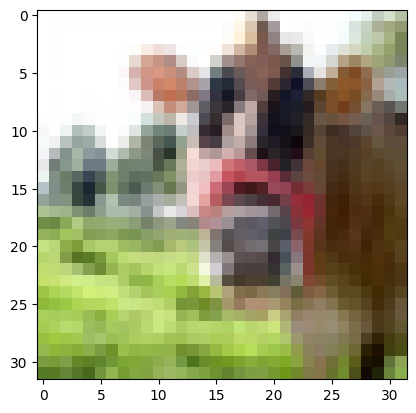

In [31]:
plt.imshow(training_images[index])
plt.show()

In [32]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='softmax')
])

In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the callback function
early_stopping = EarlyStopping(patience=5)
history=model.fit(training_images, training_labels,verbose=1,validation_split=0.2, epochs=100,callbacks=[early_stopping])

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.0495 - loss: 4.4549 - val_accuracy: 0.1563 - val_loss: 3.5968
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.1313 - loss: 3.7205 - val_accuracy: 0.1858 - val_loss: 3.4095
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1788 - loss: 3.4094 - val_accuracy: 0.2523 - val_loss: 3.0325
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2146 - loss: 3.1846 - val_accuracy: 0.2278 - val_loss: 3.1910
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2442 - loss: 3.0175 - val_accuracy: 0.3114 - val_loss: 2.7374
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2735 - loss: 2.8603 - val_accuracy: 0.3169 - val_loss: 2.7020
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2909 - loss: 2.7567 - val_accuracy: 0.3019 - val_loss: 2.7829
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3156 - l

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (32, 30, 30, 32)       │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (32, 30, 30, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 15, 15, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 13, 13, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (32, 13, 13, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (32, 4, 4, 128)        │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (32, 4, 4, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 2, 2, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 512)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 128)              │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 100)              │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 517,230 (1.97 MB)

 Trainable params: 172,260 (672.89 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 344,522 (1.31 MB)

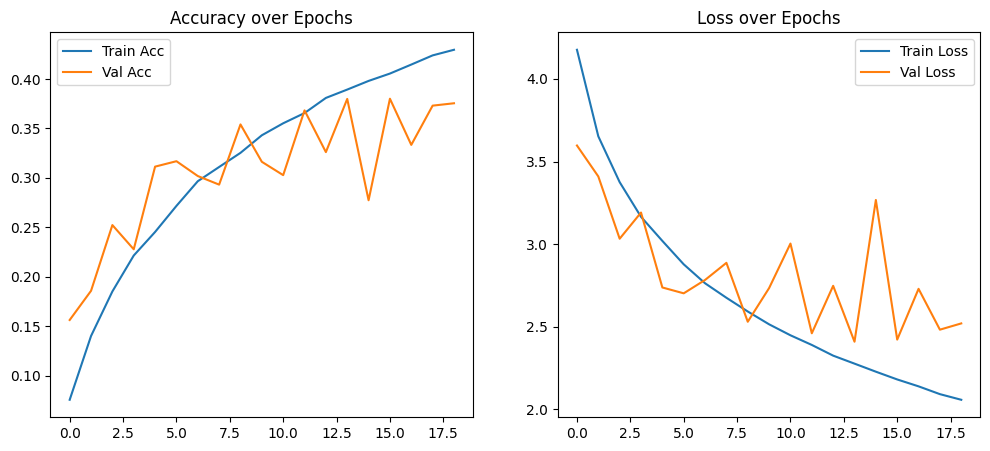

In [37]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3787 - loss: 2.5193
Test Accuracy: 0.3760


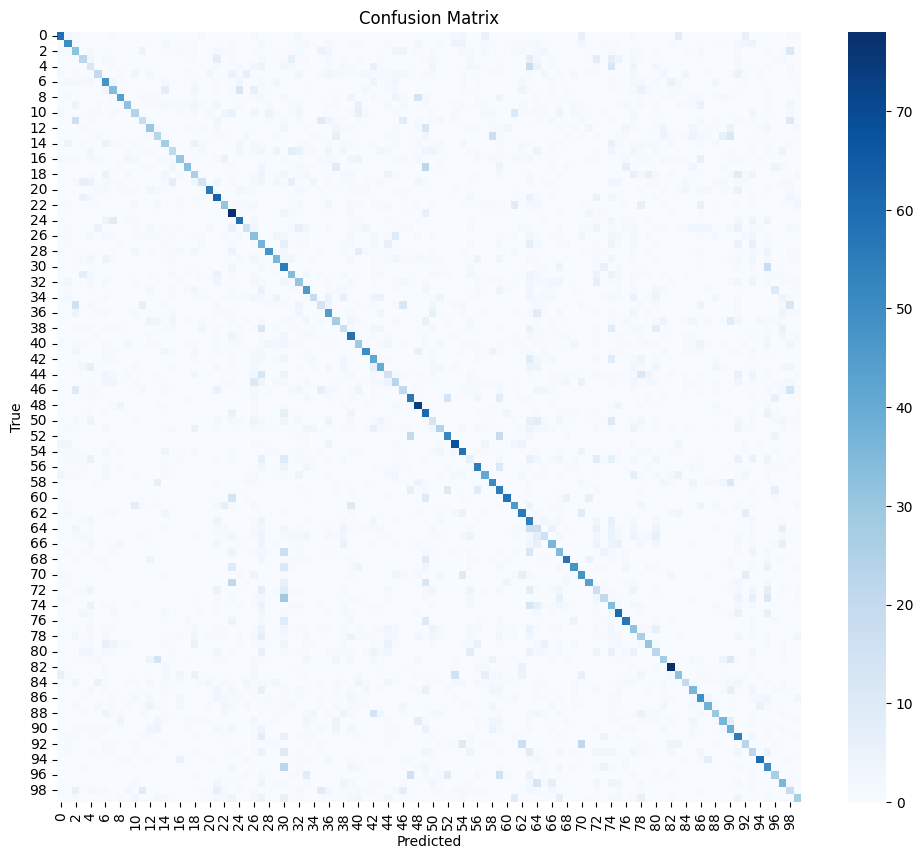

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict
y_pred_probs = model.predict(test_images)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_labels.flatten()

# Accuracy
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [40]:
from sklearn.metrics import classification_report

y_true = np.argmax(test_labels, axis=1)
y_pred = np.argmax(model.predict(test_images), axis=1)

report = classification_report(y_true, y_pred, output_dict=True)

for i in range(100):
    acc = report[str(i)]['recall']
    print(f'Class {i} Accuracy: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Class 0 Accuracy: 0.0081
Class 1 Accuracy: 0.0
Class 2 Accuracy: 0.0
Class 3 Accuracy: 0.0
Class 4 Accuracy: 0.0
Class 5 Accuracy: 0.0
Class 6 Accuracy: 0.0
Class 7 Accuracy: 0.0
Class 8 Accuracy: 0.0
Class 9 Accuracy: 0.0
Class 10 Accuracy: 0.0
Class 11 Accuracy: 0.0
Class 12 Accuracy: 0.0
Class 13 Accuracy: 0.0
Class 14 Accuracy: 0.0
Class 15 Accuracy: 0.0
Class 16 Accuracy: 0.0
Class 17 Accuracy: 0.0
Class 18 Accuracy: 0.0
Class 19 Accuracy: 0.0
Class 20 Accuracy: 0.0
Class 21 Accuracy: 0.0
Class 22 Accuracy: 0.0
Class 23 Accuracy: 0.0
Class 24 Accuracy: 0.0
Class 25 Accuracy: 0.0
Class 26 Accuracy: 0.0
Class 27 Accuracy: 0.0
Class 28 Accuracy: 0.0
Class 29 Accuracy: 0.0
Class 30 Accuracy: 0.0
Class 31 Accuracy: 0.0
Class 32 Accuracy: 0.0
Class 33 Accuracy: 0.0
Class 34 Accuracy: 0.0
Class 35 Accuracy: 0.0
Class 36 Accuracy: 0.0
Class 37 Accuracy: 0.0
Class 38 Accuracy: 0.0
Class 39 Accuracy: 0.0
Class 40 Accuracy: 0.0
Class 41 Accuracy: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
loss,accuracy= model.evaluate(test_images, test_labels)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3787 - loss: 2.5193
Loss: 2.5110650062561035
Accuracy: 0.37599998712539673


In [42]:
classifications = model.predict(test_images)
print('Probability of Each Class')
print(classifications[0])
print()
print('Rounded Classification')
rounded_classification = np.round(classifications,2)
print(rounded_classification[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Probability of Each Class
[1.18941568e-08 1.51969449e-04 5.63353882e-04 9.25816828e-04 4.62884549e-04 4.89022874e-04 1.18984863e-05 4.04267135e-04 3.76553345e-03 2.90363008e-04 5.23562339e-05 2.02168390e-04 4.18397747e-02 1.00832600e-04 2.36474207e-05 1.00620172e-03 3.48950707e-04 6.84805927e-05 2.55157473e-04 6.59793513e-05 9.05434790e-05
 1.26316445e-04 2.67183146e-04 1.92216076e-02 1.20788027e-04 1.08337461e-03 1.64606841e-03 2.34602299e-03 2.32666189e-05 7.49642437e-04 1.97280064e-01 1.10082634e-04 1.49882305e-03 1.10854540e-04 1.16675810e-05 3.70569724e-05 8.26983796e-06 1.79958460e-03 8.93269083e-04 1.04890401e-02 8.03564303e-03 3.23101085e-05
 4.88306614e-05 1.75037727e-07 8.89271218e-03 2.45388970e-03 6.06400194e-04 2.07290668e-06 9.49557405e-04 1.85104415e-01 8.12378828e-04 4.13751477e-05 2.19245834e-07 1.45081758e-09 1.53672067e-04 9.51736793e-03 7.32028348e-05 2.87718854e-06 1.22524230e-04 5.54003986e-04 6.86784741e-04 6.62911771e-05 

In [43]:
print(test_labels[0])

[49]
